# Time Series Model Comparison

This notebook compares the performance of four different models for time series prediction:
- Linear Model
- Dense Neural Network
- Convolutional Neural Network (Conv1D)
- LSTM (Long Short-Term Memory)

We'll use the existing `TimeSeriesPredictor` class to train and evaluate all models.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
import os
import sys

NOTEBOOK_DIR = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
PROJECT_PATH = os.path.abspath(os.path.join(NOTEBOOK_DIR, '..'))
sys.path.append(PROJECT_PATH)

from core.utils.time_series_utils import WindowGenerator, TimeSeriesPredictor

print("TimeSeriesPredictor imported successfully!")

TimeSeriesPredictor imported successfully!


## 1. Data Loading and Preparation

Using the existing data loading method.

In [7]:
predictor = TimeSeriesPredictor(max_horizon=24)

CSV_FILE = 'merged_dataset.csv'  
CSV_PATH = os.path.join(PROJECT_PATH, 'data', CSV_FILE)

train_df, val_df, test_df, date_time = predictor.load_data_from_csv(CSV_PATH)
print(f"Data loaded successfully!")
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"Features: {list(train_df.columns)}")

Data loaded successfully!
Training set shape: (28465, 18)
Validation set shape: (9488, 18)
Test set shape: (9489, 18)
Features: ['hydraulic_71', 'hydraulic_36', 'hydraulic_1', 'solar_14', 'wind_12', 'nuclear_39', 'nuclear_4', 'nuclear_74', 'peninsula_forecast_460', 'scheduled_demand_365', 'scheduled_demand_358', 'scheduled_demand_372', 'daily_spot_market_600_España', 'daily_spot_market_600_Portugal', 'average_demand_price_573_Baleares', 'average_demand_price_573_Canarias', 'average_demand_price_573_Ceuta', 'average_demand_price_573_Melilla']


## 2. Model Training

Using the existing training method to train all four models.

In [8]:
print("Starting model training...")
print("=" * 50)

performance = predictor.train_models(train_df, val_df, test_df)

print("\nTraining completed!")
print(f"Models trained: {list(predictor.models.keys())}")

Starting model training...


2025-06-15 14:57:12.586107: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


✓ Modelo linear entrenado exitosamente - Loss: 0.0410, MAE: 0.1380
✓ Modelo dense entrenado exitosamente - Loss: 0.0492, MAE: 0.1646
✓ Modelo conv entrenado exitosamente - Loss: 0.1580, MAE: 0.3024
✓ Modelo lstm entrenado exitosamente - Loss: 0.0240, MAE: 0.1108

Training completed!
Models trained: ['linear', 'dense', 'conv', 'lstm']


## 3. Performance Analysis

Let's analyze and compare the performance of all models.

Resumen de los resultados de los modelos:
          loss  mean_absolute_error
lstm    0.0240               0.1108
linear  0.0410               0.1380
dense   0.0492               0.1646
conv    0.1580               0.3024


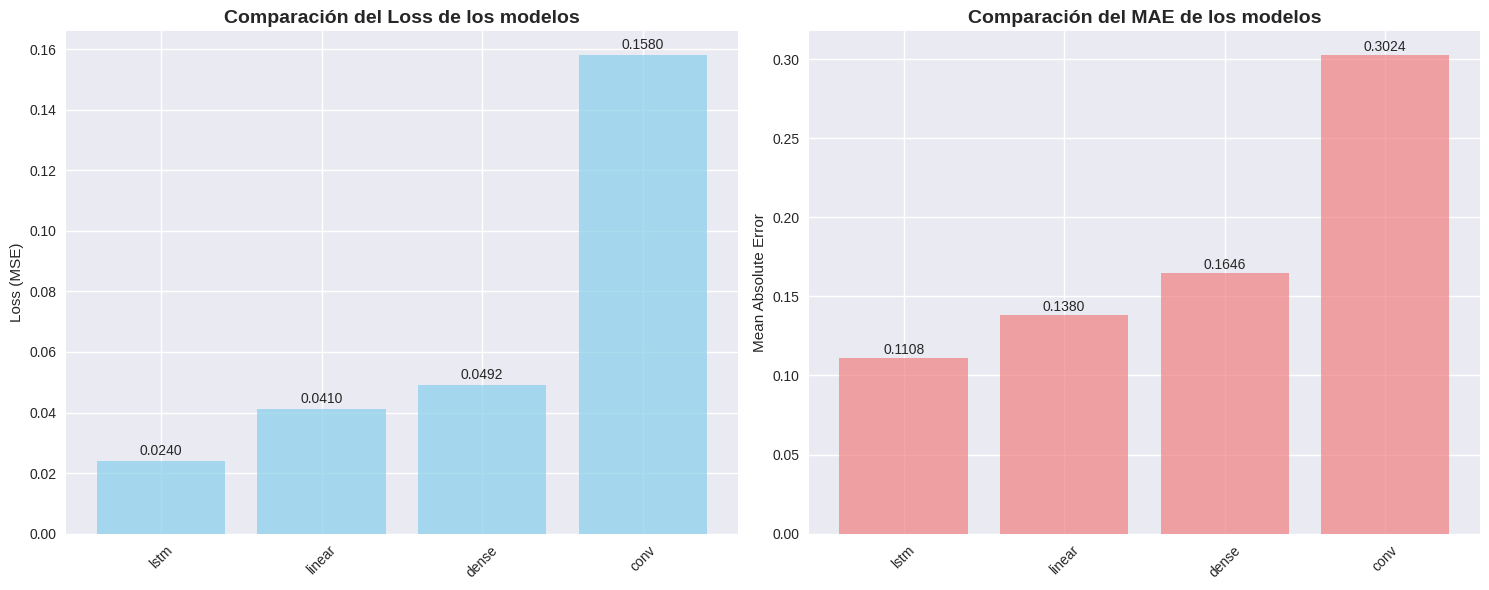


🏆 Modelo con mejores resultados: lstm
   Loss: 0.0240
   MAE: 0.1108


In [12]:
performance_df = pd.DataFrame(performance).T
performance_df = performance_df.sort_values('loss')

print("Resumen de los resultados de los modelos:")
print("=" * 40)
print(performance_df.round(4))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(performance_df.index, performance_df['loss'], color='skyblue', alpha=0.7)
ax1.set_title('Comparación del Loss de los modelos', fontsize=14, fontweight='bold')
ax1.set_ylabel('Loss (MSE)')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(performance_df['loss']):
    ax1.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')

ax2.bar(performance_df.index, performance_df['mean_absolute_error'], color='lightcoral', alpha=0.7)
ax2.set_title('Comparación del MAE de los modelos', fontsize=14, fontweight='bold')
ax2.set_ylabel('Mean Absolute Error')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(performance_df['mean_absolute_error']):
    ax2.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

best_model = performance_df.index[0]
print(f"\n🏆 Modelo con mejores resultados: {best_model}")
print(f"   Loss: {performance_df.loc[best_model, 'loss']:.4f}")
print(f"   MAE: {performance_df.loc[best_model, 'mean_absolute_error']:.4f}")

## 4. Prediction Testing

Let's test predictions with different horizons using your existing prediction method.

In [13]:
test_data_denorm = test_df * predictor.train_std + predictor.train_mean
recent_data = test_data_denorm.tail(24).values

print(f"Utilizando las últimas 24 horas de datos de prueba para hacer predicciones")
print(f"Formato de los datos de entrada: {recent_data.shape}")

horizons_to_test = [1, 6, 12, 24]
prediction_results = {}

for horizon in horizons_to_test:
    print(f"\nProbando predicción con horizonte: {horizon} horas")
    print("-" * 30)
    
    horizon_results = {}
    
    for model_name in predictor.models.keys():
        try:
            result = predictor.predict(model_name, recent_data, hours_ahead=horizon)
            horizon_results[model_name] = result
            print(f"✓ {model_name}: Success")
        except Exception as e:
            print(f"✗ {model_name}: {str(e)}")
    
    prediction_results[horizon] = horizon_results

print("\nPruebas de predicciones completadas!")

Utilizando las últimas 24 horas de datos de prueba para hacer predicciones
Formato de los datos de entrada: (24, 18)

Probando predicción con horizonte: 1 horas
------------------------------
✓ linear: Success
✓ dense: Success
✓ conv: Success
✓ lstm: Success

Probando predicción con horizonte: 6 horas
------------------------------
✓ linear: Success
✓ dense: Success
✓ conv: Success
✓ lstm: Success

Probando predicción con horizonte: 12 horas
------------------------------
✓ linear: Success
✓ dense: Success
✓ conv: Success
✓ lstm: Success

Probando predicción con horizonte: 24 horas
------------------------------
✓ linear: Success
✓ dense: Success
✓ conv: Success
✓ lstm: Success

Pruebas de predicciones completadas!


## 5. Prediction Visualization

Let's visualize predictions from different models and compare them.

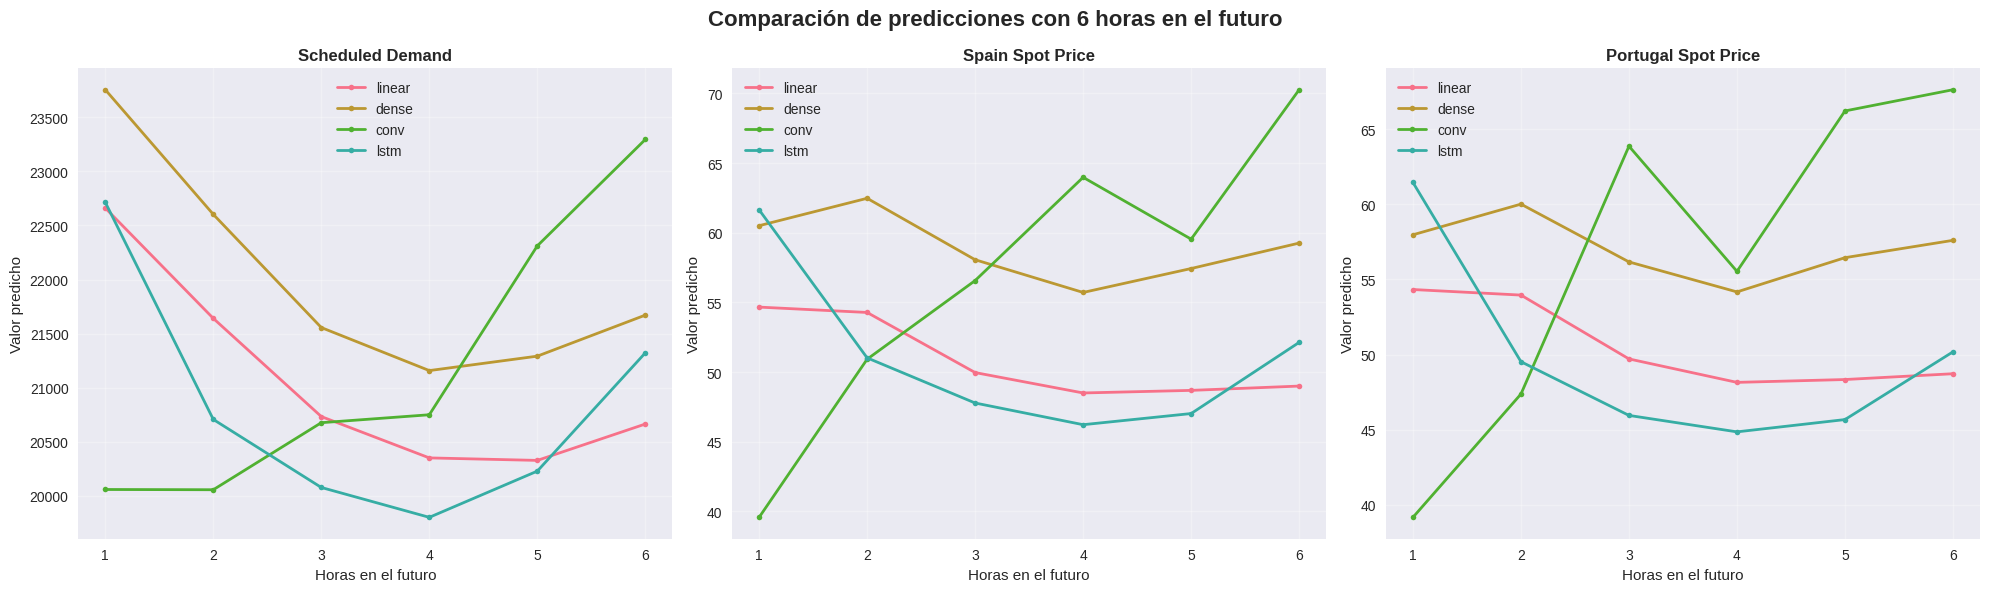

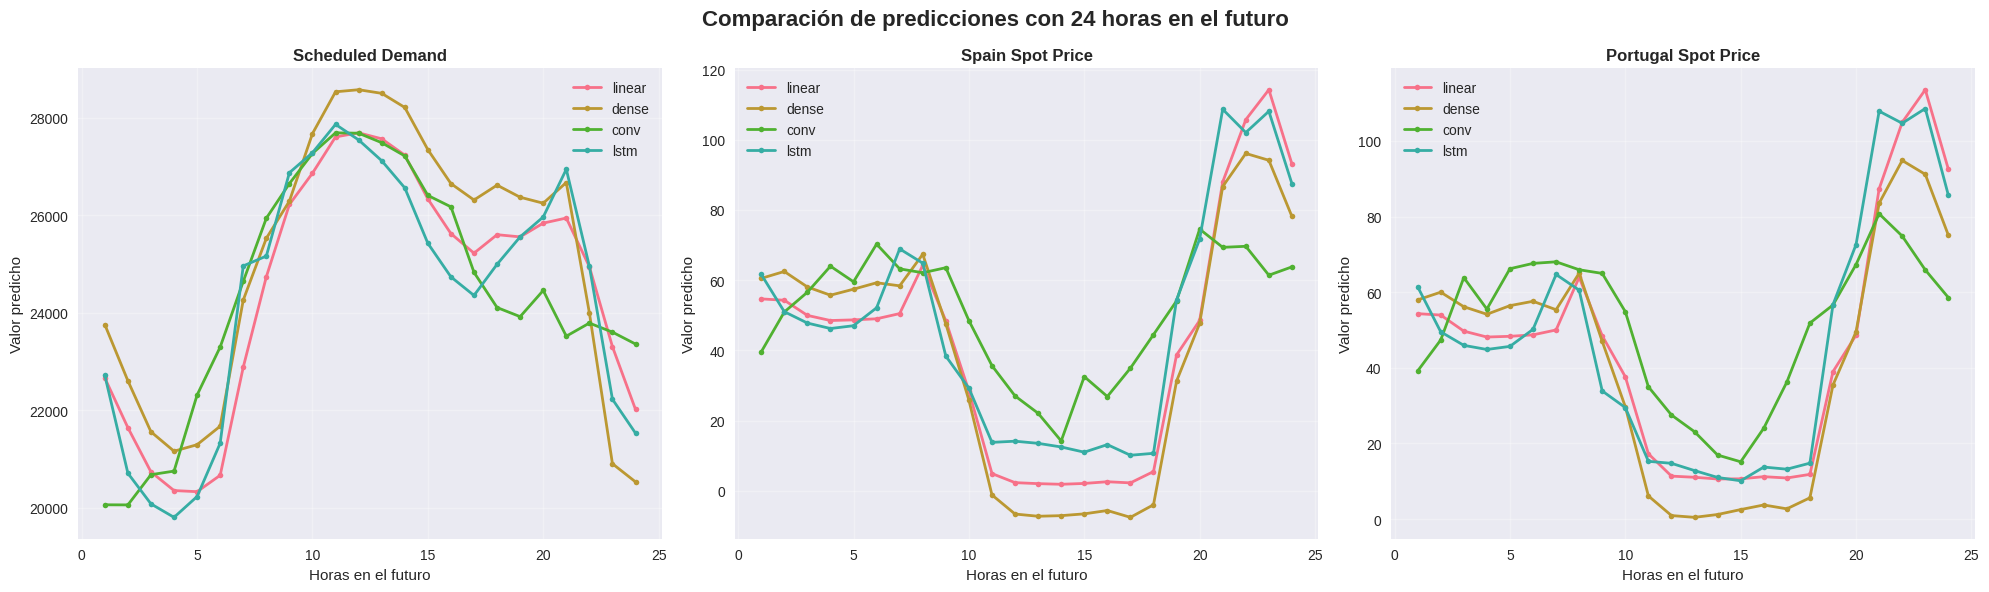

In [15]:
features_to_plot = ['scheduled_demand_372', 'daily_spot_market_600_España', 'daily_spot_market_600_Portugal']
feature_titles = ['Scheduled Demand', 'Spain Spot Price', 'Portugal Spot Price']

for horizon in [6, 24]:  
    if horizon not in prediction_results:
        continue
        
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Comparación de predicciones con {horizon} horas en el futuro', fontsize=16, fontweight='bold')
    
    for i, (feature, title) in enumerate(zip(features_to_plot, feature_titles)):
        ax = axes[i]
        
        for model_name, result in prediction_results[horizon].items():
            if 'predictions' in result:
                predictions = result['predictions'][feature]
                hours = list(range(1, len(predictions) + 1))
                ax.plot(hours, predictions, marker='o', label=f'{model_name}', linewidth=2, markersize=4)
        
        ax.set_title(f'{title}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Horas en el futuro')
        ax.set_ylabel('Valor predicho')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 6. Prediction Accuracy Analysis

Let's create some metrics to compare prediction accuracy across models.

In [18]:
def calculate_prediction_stats(predictions_dict):
    stats = {}
    
    for horizon, horizon_results in predictions_dict.items():
        horizon_stats = {}
        
        for model_name, result in horizon_results.items():
            if 'predictions' not in result:
                continue
                
            model_stats = {}
            
            for feature, predictions in result['predictions'].items():
                pred_array = np.array(predictions)
                model_stats[feature] = {
                    'media': np.mean(pred_array),
                    'desviación estándar': np.std(pred_array),
                    'min': np.min(pred_array),
                    'max': np.max(pred_array),
                    'rango': np.max(pred_array) - np.min(pred_array)
                }
            
            horizon_stats[model_name] = model_stats
        
        stats[horizon] = horizon_stats
    
    return stats

prediction_stats = calculate_prediction_stats(prediction_results)

if 24 in prediction_stats:
    print("Estadísticas de predicciones para 24 horas:")
    print("=" * 50)
    
    for feature in features_to_plot:
        print(f"\n{feature}:")
        print("-" * 30)
        
        stats_df = pd.DataFrame({
            model: stats[feature] 
            for model, stats in prediction_stats[24].items() 
            if feature in stats
        }).T
        
        if not stats_df.empty:
            print(stats_df.round(2))

Estadísticas de predicciones para 24 horas:

scheduled_demand_372:
------------------------------
           media  desviación estándar       min       max    rango
linear  24479.48              2431.77  20328.89  27686.37  7357.49
dense   25049.33              2680.63  20529.80  28569.87  8040.07
conv    24409.50              2376.99  20057.84  27686.13  7628.29
lstm    24368.44              2559.59  19802.75  27859.13  8056.39

daily_spot_market_600_España:
------------------------------
        media  desviación estándar    min     max   rango
linear  42.01                33.91   1.83  114.27  112.44
dense   39.19                35.44  -7.59   96.11  103.70
conv    50.36                17.02  14.18   74.55   60.37
lstm    47.43                31.59  10.10  108.69   98.58

daily_spot_market_600_Portugal:
------------------------------
        media  desviación estándar    min     max   rango
linear  45.18                30.19  10.62  113.54  102.92
dense   41.35                30.70 

## 7. Model Behavior Analysis

Let's analyze how different models behave with varying input lengths.

In [19]:
input_lengths = [12, 24, 48]  
horizon = 12  

input_length_results = {}

for input_len in input_lengths:
    if input_len > len(test_data_denorm):
        continue
        
    print(f"\nPruebas con {input_len} horas de datos de entrada:")
    print("-" * 40)
    
    input_data = test_data_denorm.tail(input_len).values
    
    length_results = {}
    
    for model_name in predictor.models.keys():
        try:
            result = predictor.predict(model_name, input_data, hours_ahead=horizon)
            length_results[model_name] = result
            
            mean_demand = np.mean(result['predictions']['scheduled_demand_372'])
            print(f"✓ {model_name}: Media de la demanda predicha = {mean_demand:.2f}")
            
        except Exception as e:
            print(f"✗ {model_name}: {str(e)}")
    
    input_length_results[input_len] = length_results

print("\nPruebas de longitud de entrada completadas!")


Pruebas con 12 horas de datos de entrada:
----------------------------------------
✓ linear: Media de la demanda predicha = 25428.64
✓ dense: Media de la demanda predicha = 25692.79
✓ conv: Media de la demanda predicha = 45559.88
✓ lstm: Media de la demanda predicha = 25027.47

Pruebas con 24 horas de datos de entrada:
----------------------------------------
✓ linear: Media de la demanda predicha = 23530.32
✓ dense: Media de la demanda predicha = 24405.86
✓ conv: Media de la demanda predicha = 23916.78
✓ lstm: Media de la demanda predicha = 23709.87

Pruebas con 48 horas de datos de entrada:
----------------------------------------
✓ linear: Media de la demanda predicha = 23327.48
✓ dense: Media de la demanda predicha = 24031.93
✓ conv: Media de la demanda predicha = 24037.58
✓ lstm: Media de la demanda predicha = 23157.19

Pruebas de longitud de entrada completadas!


## 8. Model Stability Analysis

Let's test how stable the predictions are by running multiple predictions.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

def test_prediction_stability(predictor, test_data, n_tests=5, horizon=6):
    """Prueba la estabilidad de las predicciones en múltiples ejecuciones"""
    stability_results = {}
    
    for model_name in predictor.models.keys():
        model_predictions = []
        
        for i in range(n_tests):
            start_idx = max(0, len(test_data) - 24 - i)
            end_idx = start_idx + 24
            input_data = test_data[start_idx:end_idx]
            
            try:
                result = predictor.predict(model_name, input_data, hours_ahead=horizon)
                model_predictions.append(result['predictions'])
            except Exception as e:
                print(f"Error en {model_name} prueba {i}: {e}")
        
        stability_results[model_name] = model_predictions
    
    return stability_results

print("Probando la estabilidad de las predicciones...")
stability_results = test_prediction_stability(predictor, test_data_denorm.values)

stability_metrics = {}
for model_name, predictions in stability_results.items():
    if not predictions:
        continue
        
    demand_predictions = [pred['scheduled_demand_372'] for pred in predictions]
    
    if demand_predictions:
        pred_array = np.array(demand_predictions)
        
        cv_per_step = np.std(pred_array, axis=0) / np.abs(np.mean(pred_array, axis=0))
        avg_cv = np.mean(cv_per_step)
        
        stability_metrics[model_name] = {
            'coef_var_promedio': avg_cv,
            'coef_var_max': np.max(cv_per_step),
            'coef_var_min': np.min(cv_per_step)
        }

print("\nAnálisis de estabilidad de predicciones (Demanda):")
print("=" * 45)
print("Menor coeficiente de variación = predicciones más estables")
print()

stability_df = pd.DataFrame(stability_metrics).T
if not stability_df.empty:
    stability_df = stability_df.sort_values('coef_var_promedio')
    print(stability_df.round(4))
    
    print(f"\nModelo más estable: {stability_df.index[0]}")
    print(f"CV promedio: {stability_df.iloc[0]['coef_var_promedio']:.4f}")
else:
    print("No se pudieron calcular métricas de estabilidad.")

Probando la estabilidad de las predicciones...

Análisis de estabilidad de predicciones (Demanda):
Menor coeficiente de variación = predicciones más estables

        coef_var_promedio  coef_var_max  coef_var_min
dense              0.0391        0.0570        0.0234
linear             0.0492        0.0626        0.0230
lstm               0.0509        0.0838        0.0259
conv               0.0538        0.0929        0.0125

Modelo más estable: dense
CV promedio: 0.0391


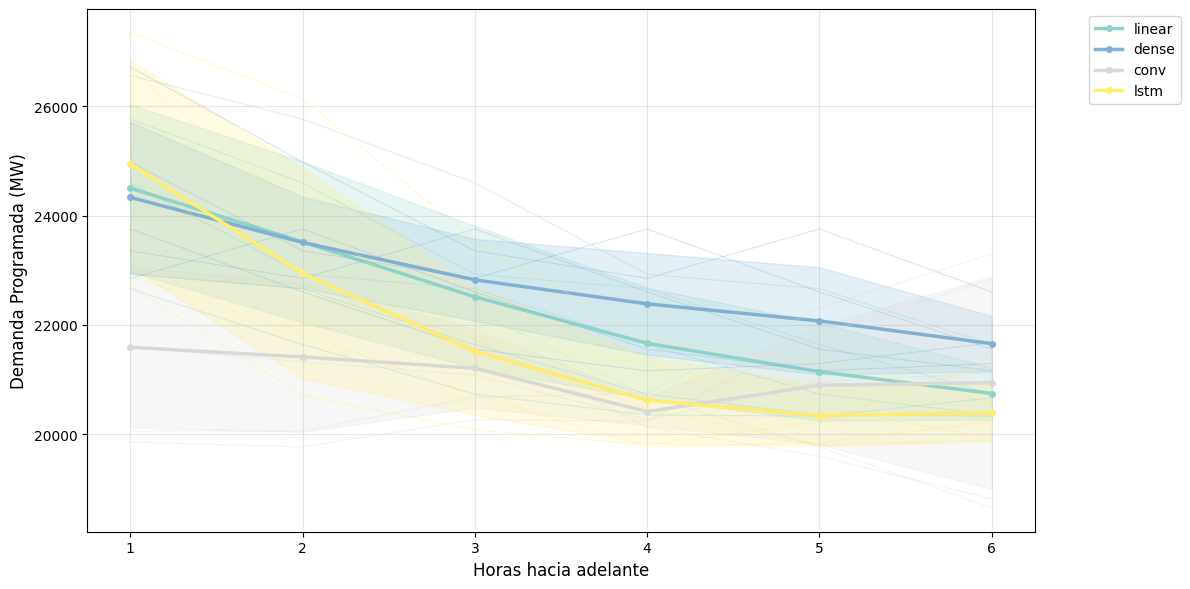

In [ ]:
plt.figure(figsize=(12, 6))

colors = plt.cm.Set3(np.linspace(0, 1, len(stability_results)))

for idx, (model_name, predictions) in enumerate(stability_results.items()):
    if not predictions:
        continue
        
    demand_predictions = [pred['scheduled_demand_372'] for pred in predictions]
    
    if demand_predictions:
        pred_array = np.array(demand_predictions)
        mean_pred = np.mean(pred_array, axis=0)
        std_pred = np.std(pred_array, axis=0)
        
        hours = range(1, len(mean_pred) + 1)
        
        plt.plot(hours, mean_pred, 
                color=colors[idx], 
                linewidth=2.5, 
                label=f'{model_name}', 
                marker='o', 
                markersize=4)
        
        plt.fill_between(hours, 
                       mean_pred - std_pred, 
                       mean_pred + std_pred,
                       color=colors[idx], 
                       alpha=0.2)
        
        for pred in demand_predictions:
            plt.plot(hours, pred, 
                    color=colors[idx], 
                    alpha=0.3, 
                    linewidth=0.8)

plt.xlabel('Horas hacia adelante', fontsize=12)
plt.ylabel('Demanda Programada (MW)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

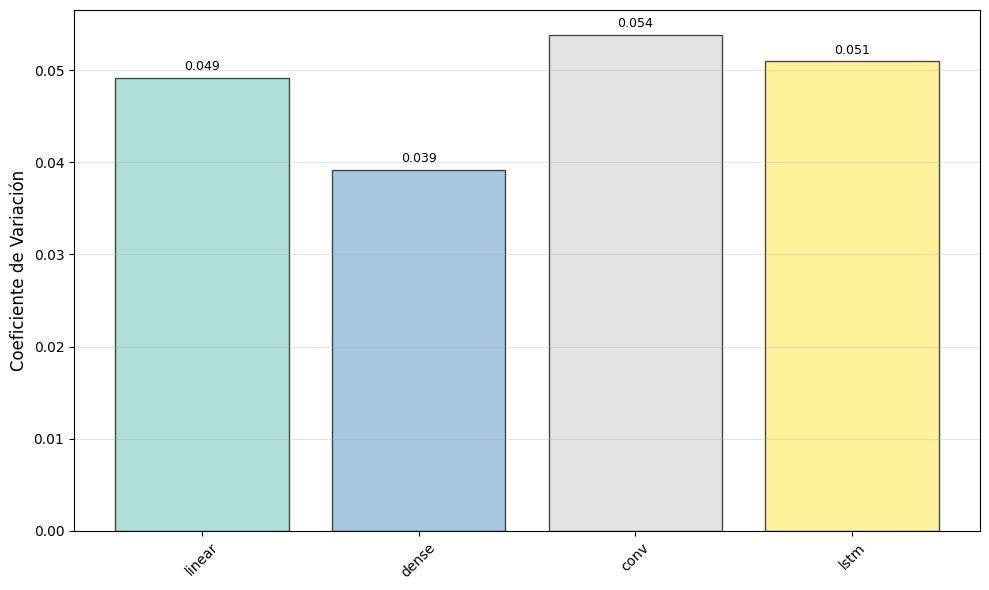

In [ ]:
plt.figure(figsize=(10, 6))

if stability_metrics:
    models = list(stability_metrics.keys())
    cv_values = [stability_metrics[model]['coef_var_promedio'] for model in models]
    colors = plt.cm.Set3(np.linspace(0, 1, len(models)))
    
    bars = plt.bar(models, cv_values, color=colors, alpha=0.7, edgecolor='black')
    plt.ylabel('Coeficiente de Variación', fontsize=12)
    plt.xticks(rotation=45)
    
    for bar, cv in zip(bars, cv_values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(cv_values)*0.01,
                f'{cv:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

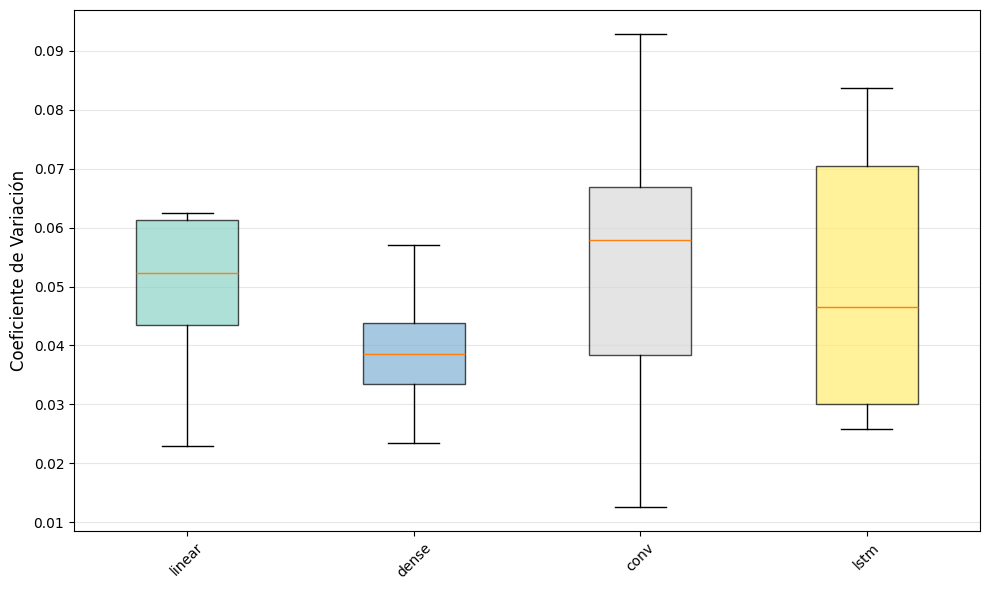

In [ ]:
plt.figure(figsize=(10, 6))

cv_by_step_data = []
model_labels = []
colors = plt.cm.Set3(np.linspace(0, 1, len(stability_results)))

for model_name, predictions in stability_results.items():
    if not predictions:
        continue
        
    demand_predictions = [pred['scheduled_demand_372'] for pred in predictions]
    
    if demand_predictions:
        pred_array = np.array(demand_predictions)
        cv_per_step = np.std(pred_array, axis=0) / np.abs(np.mean(pred_array, axis=0))
        cv_by_step_data.append(cv_per_step)
        model_labels.append(model_name)

if cv_by_step_data:
    bp = plt.boxplot(cv_by_step_data, labels=model_labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.ylabel('Coeficiente de Variación', fontsize=12)
    plt.xticks(rotation=45)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()